In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import svm

**Importing the dataset**

In [4]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [7]:
x=df.drop(columns=['User ID','Gender','Purchased'])
y=df['Purchased']
print(x.shape,y.shape)

(400, 2) (400,)


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

**Feature Scaling**

In [9]:
sca=StandardScaler()
x_train=sca.fit_transform(x_train)
x_test=sca.transform(x_test)

**Fitting SVM to the Training set**

In [10]:
smodel=svm.SVC(kernel='rbf',gamma='scale')
smodel.fit(x_train,y_train)

SVC()

**Predicting the Test set results**

In [11]:
y_pred=smodel.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

**Making the Confusion Matrix**

In [12]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[49,  6],
       [ 4, 21]])

In [13]:
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,49,6,55
1,4,21,25
All,53,27,80


**Visualising the Training set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


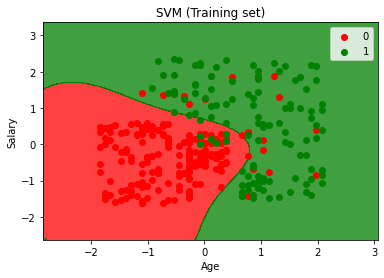

In [15]:
from matplotlib.colors import ListedColormap


X1, X2 = np.meshgrid(np.arange(start = x_train[:, 0].min() - 1, stop = x_train[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_train[:, 1].min() - 1, stop = x_train[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, smodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train == j, 0], x_train[y_train == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM -Train set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


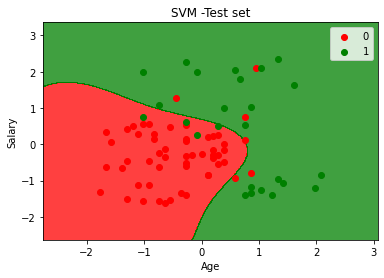

In [16]:
X1, X2 = np.meshgrid(np.arange(start = x_test[:, 0].min() - 1, stop = x_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test[:, 1].min() - 1, stop = x_test[:, 1].max() + 1, step = 0.01))
# meshgrid function creates a rectangular grid out of an array of x values and an array of y values
plt.contourf(X1, X2, smodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#contourf method draws filled contours, so we use this method to fill the background with the color of the class associated to it.
#for each pixel make prediction and color with the associated predicted class.Two classes, so use red and green for 0 and 1
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#loop over all the test data points predict the label and color
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_test[y_test == j, 0], x_test[y_test == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM -Test set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()